In [2]:
import numpy
import math
import cmath
from matplotlib import pyplot
%matplotlib inline

In [3]:
#Define grid parameters

N = 100
Xmin = -2.0; Xmax = 2.0
Ymin = -2.0; Ymax = 2.0

x = numpy.linspace(Xmin, Xmax, N);
y = numpy.linspace(Ymin, Ymax, N);

dx = x[1]-x[0]; dy = y[1]-y[0];

X, Y = numpy.meshgrid(x, y)

Z = X + 1j*Y

In [4]:
uinf = 1.0
alpha = 10.*math.pi/180

W = uinf*Z*(math.cos(alpha)-1j*math.sin(alpha))
wvel = uinf*(math.cos(alpha)-1j*math.sin(alpha))

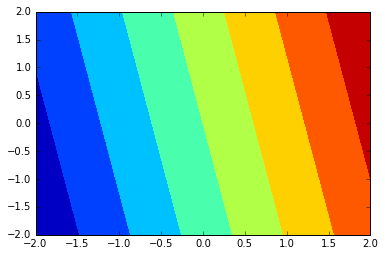

In [5]:
pyplot.figure()
cs = pyplot.contourf(X,Y,W.real) # contour() accepts complex values

In [6]:
#Source
sigma = 1.0
zc = 1.0-1j

wvel = sigma/2.0/math.pi*1.0/(Z-zc)

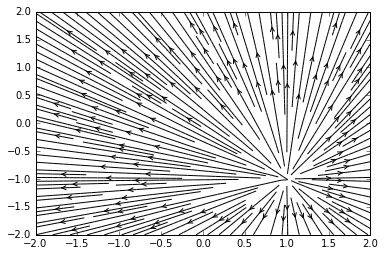

In [7]:
pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.streamplot(X, Y, wvel.real, -1.0*wvel.imag, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')

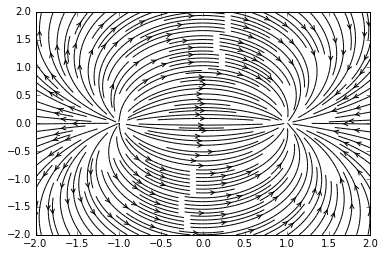

In [8]:
#source/ sink pair
zc1 = -1.0 - 0*1j
zc2 = 1.0 - 0*1j
wvel = sigma/2.0/math.pi*1.0/(Z-zc1) - sigma/2.0/math.pi*1.0/(Z-zc2)

pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.streamplot(X, Y, wvel.real, -1.0*wvel.imag, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')

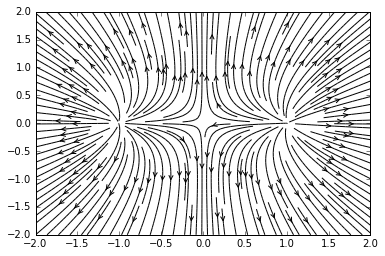

In [9]:
#Flow around wall at X = 0.0
zc1 = -1.0 - 0*1j
zc2 = 1.0 - 0*1j
wvel = sigma/2.0/math.pi*1.0/(Z-zc1) + sigma/2.0/math.pi*1.0/(Z-zc2)

pyplot.xlim(Xmin, Xmax)
pyplot.ylim(Ymin, Ymax)
pyplot.streamplot(X, Y, wvel.real, -1.0*wvel.imag, density=2, linewidth=1, color ='#000000', arrowsize=1, arrowstyle='->')

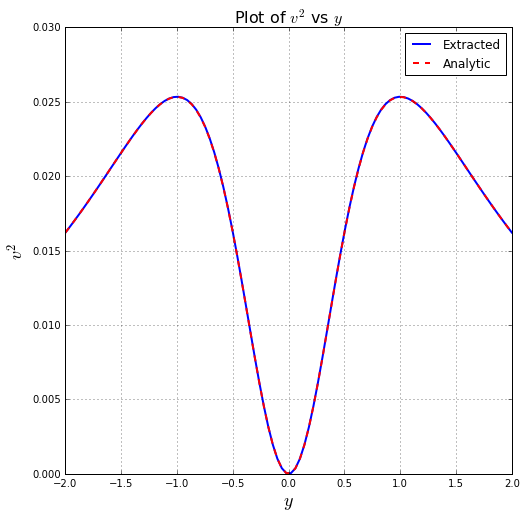

In [10]:
a = abs(zc1)
vanalytic = (sigma/math.pi*y/(y**2+a**2))**2

pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel('$y$', fontsize=18)
pyplot.ylabel('$v^2$', fontsize=18)
pyplot.title('Plot of $v^2$ vs $y$', fontsize = 16)
pyplot.plot(y,wvel.imag[:,int(N/2)]**2, ls = '-', lw = 2, label='Extracted')
pyplot.plot(y,vanalytic,color='#FF0000', ls='--', lw = 2, label='Analytic')
pyplot.legend(loc= 'upper right')

In [12]:
def JoukowskiTransform(zetamat, a):
    zmat = zetamat + a**2/zetamat
    return zmat

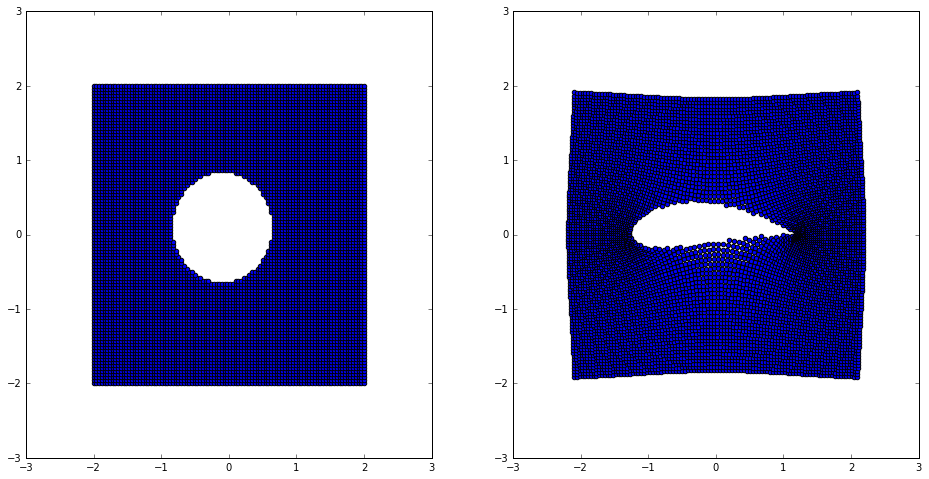

In [19]:
N = 100
Xmin = -2.0; Xmax = 2.0
Ymin = -2.0; Ymax = 2.0

x = numpy.linspace(Xmin, Xmax, N);
y = numpy.linspace(Ymin, Ymax, N);

dx = x[1]-x[0]; dy = y[1]-y[0];

X, Y = numpy.meshgrid(x, y)

zeta = X + 1j*Y; a = 0.6

z = JoukowskiTransform(zeta,a)

pyplot.figure(figsize=(16,8))
pyplot.subplot(121)
pyplot.scatter(zeta.real[abs(zeta-(-0.1+0.1*1j))>0.75], zeta.imag[abs(zeta-(-0.1+0.1*1j))>0.75])

pyplot.subplot(122)
pyplot.scatter(z.real[abs(zeta-(-0.1+0.1*1j))>0.75], z.imag[abs(zeta-(-0.1+0.1*1j))>0.75])